<a href="https://colab.research.google.com/github/smperez1997/PRY_MachineLearning/blob/main/EXAMEN_UNIDAD_I_PEREZ_SAMBACHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRUEBA UNIDAD I INTELIGENCIA ARTIFICIAL II**



*   Pérez Shirley
*   Sambachi Patricia



**1)Análisis exploratorio de datos**

In [ ]:
# Importacion de librerias a usar
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# Importacion y lectura  de datos del archivo .csv.
libros = pd.read_csv('Libros_x_categorias.csv')


In [ ]:
# 1.1 Mostrar el conjunto de datos usando pandas
libros.info()
libros.describe()
libros.head(550)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
libros.shape

(550, 7)

In [ ]:
# Comprobando la presencia de valores nulos
libros.count()

Name           550
Author         550
User Rating    550
Reviews        550
Price          550
Year           550
Genre          550
dtype: int64

In [ ]:
# Comprobando la presencia de valores nulos P2
libros.isnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [ ]:
# Contar los duplicados en la columna del autor
cont_daut = libros.duplicated(subset='Author', keep='first').sum()
print(cont_daut)

302


In [ ]:
# Contar los duplicados en la columna del autor
#Visualizar los duplicados 
dupl_aut = libros.groupby(['Author']).size().reset_index(name='Duplicados')
print(dupl_aut)

                         Author  Duplicados
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 133 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 133 missing from current font.



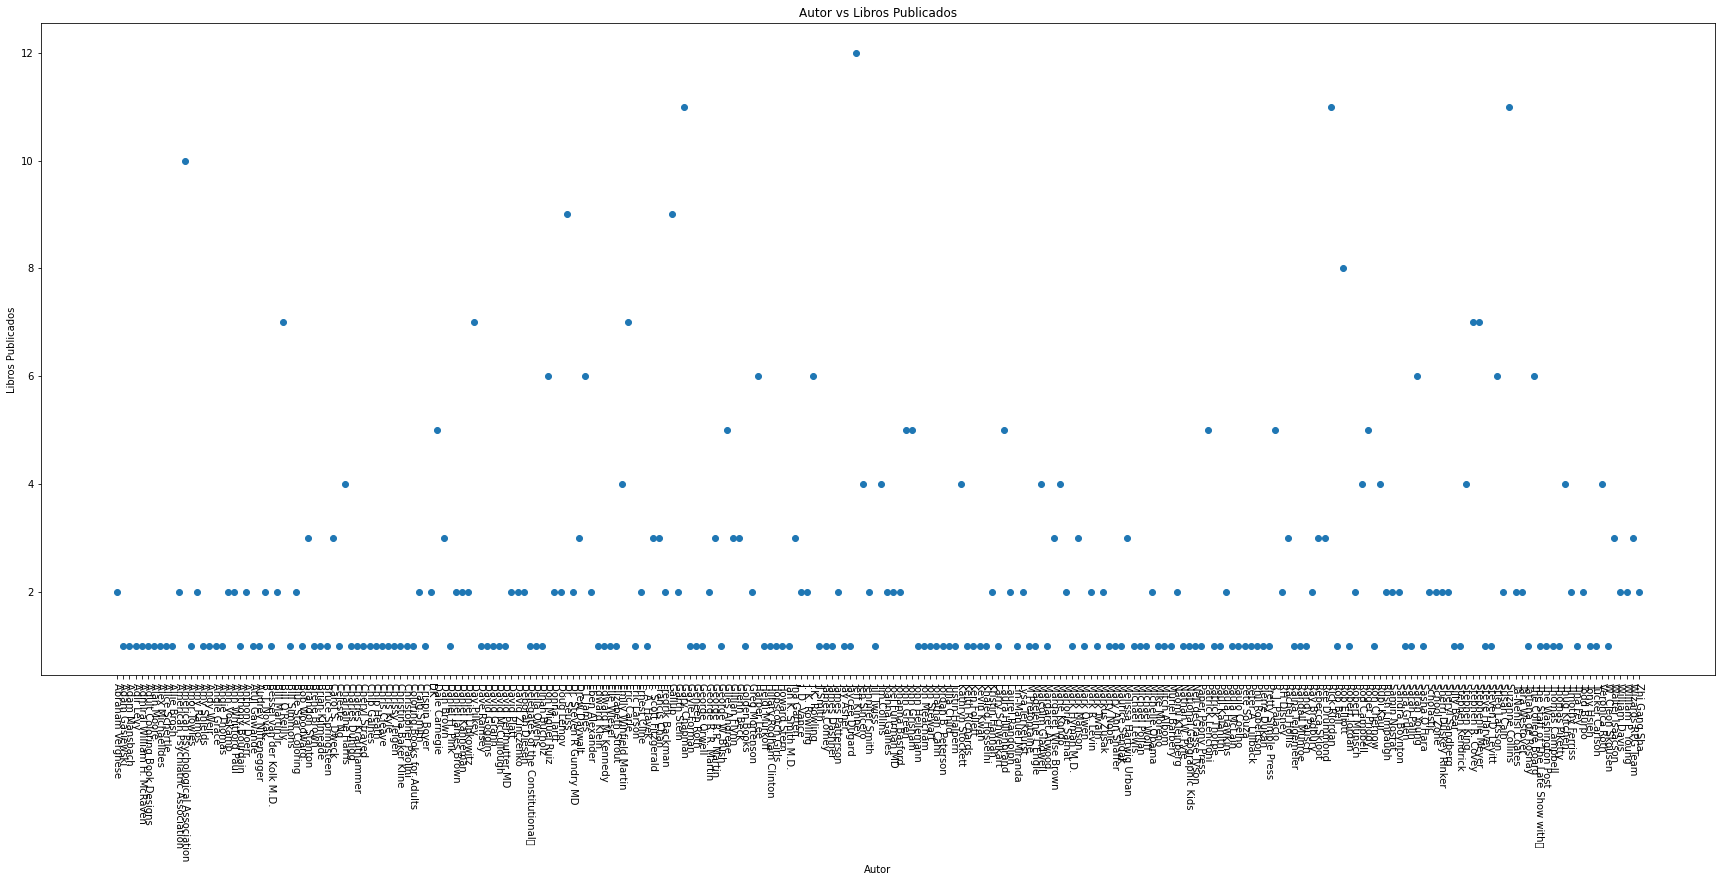

In [ ]:
#Visualizar del número total de libros publicados por los autores individuales por la trama de dispersión
autor_libroP=libros.groupby(["Author"]).size().reset_index(name="Libros")
plt.figure(figsize=(30,12))
x=np.array(autor_libroP["Author"].values)
y=np.array(autor_libroP["Libros"].values)
plt.title("Autor vs Libros Publicados")
plt.xlabel("Autor")
plt.ylabel("Libros Publicados")
plt.scatter(x,y)
plt.xticks(rotation=270)
plt.show()

In [ ]:
#Mostrar los autores y el total de sus libros publicados en orden descendente
##orden desendente segunel autor
aut_libro = libros.groupby(['Author']).size().reset_index(name='Libros Publicados')
aut_desc = aut_libro.sort_index(ascending=False)
print(aut_desc)


                         Author  Libros Publicados
247                Zhi Gang Sha                  2
246            Wizards RPG Team                  3
245            William P. Young                  2
244               William Davis                  2
243             Walter Isaacson                  3
..                          ...                ...
4    Admiral William H. McRaven                  1
3                     Adir Levy                  1
2                 Adam Mansbach                  1
1                Adam Gasiewski                  1
0              Abraham Verghese                  2

[248 rows x 2 columns]


In [ ]:
##orden desendente segun los libros publicados
libros["Author"].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
                                      ..
Raina Telgemeier                       1
Crispin Boyer                          1
Mark Twain                             1
Thomas Piketty                         1
Margaret Atwood                        1
Name: Author, Length: 248, dtype: int64

In [ ]:
#Mostrar a los 50 mejores autores con mayor número de libros publicados
may_libro = libros.groupby(['Author'])
size = may_libro.size()
size[size > 2]

Author
American Psychological Association    10
Bill O'Reilly                          7
Brandon Stanton                        3
Carol S. Dweck                         3
Charlaine Harris                       4
Dale Carnegie                          5
Dan Brown                              3
Dav Pilkey                             7
Don Miguel Ruiz                        6
Dr. Seuss                              9
Drew Daywalt                           3
E L James                              6
Emily Winfield Martin                  4
Eric Carle                             7
F. Scott Fitzgerald                    3
Francis Chan                           3
Gallup                                 9
Gary Chapman                          11
George R.R. Martin                     3
Giles Andreae                          5
Gillian Flynn                          3
Glenn Beck                             3
Harper Lee                             6
Ina Garten                             3
J.K. Rowl

In [ ]:
#Mostrar a los 50 mejores autores con mayor número de libros publicados
MP=libros["Author"].value_counts()
LibrosMP = MP.head(50)
LibrosMP 

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Dav Pilkey                             7
Stephen R. Covey                       7
Eric Carle                             7
Bill O'Reilly                          7
Stephenie Meyer                        7
J.K. Rowling                           6
Stieg Larsson                          6
Don Miguel Ruiz                        6
E L James                              6
The College Board                      6
Harper Lee                             6
Sarah Young                            6
John Grisham                           5
R. J. Palacio                          5
Dale Carnegie                          5
John Green                             5
Patrick Lencioni

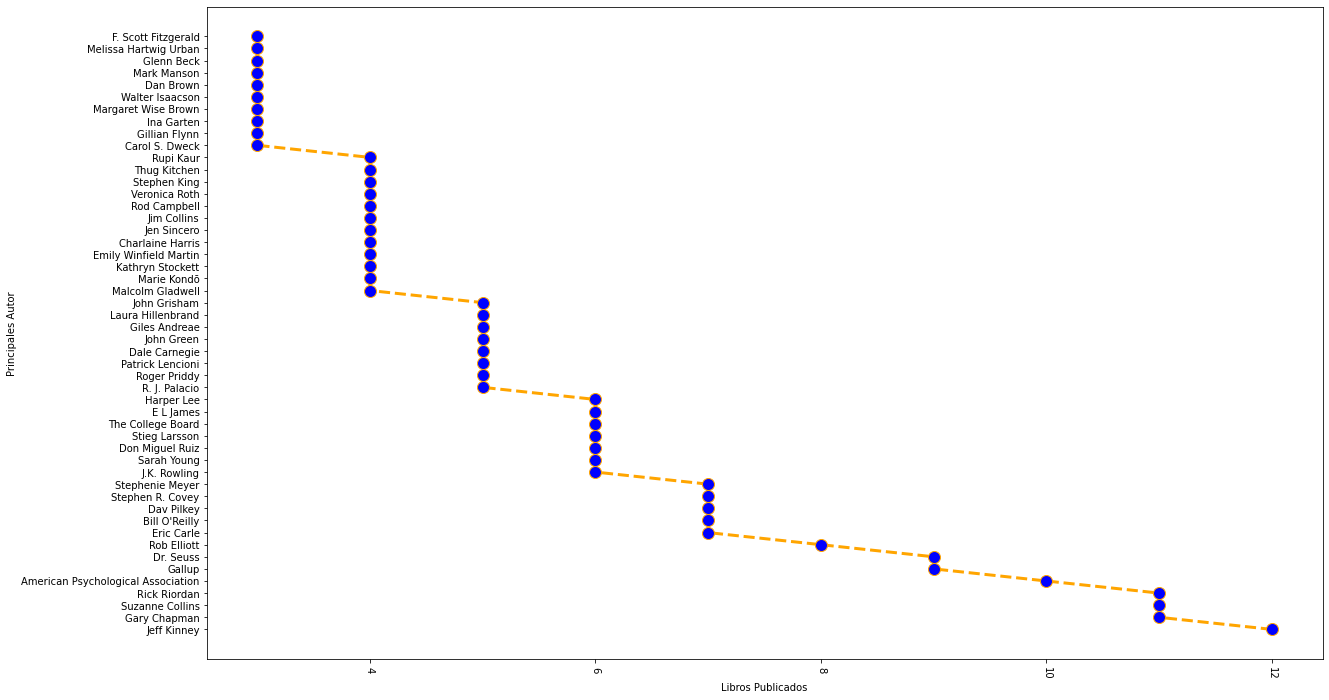

In [ ]:
#Visualizar de los 50 principales autores que tienen un mayor número de libros publicados usando la gráfica lineal
may_libro = libros.groupby(['Author']).size().reset_index(name="Libros").sort_values("Libros", ascending=False)
may_libro
MP=may_libro.head(50)
plt.figure(figsize=(20,12))
y1=np.array(MP["Author"].values)
x1=np.array(MP["Libros"].values)
plt.ylabel("Principales Autor")
plt.xlabel("Libros Publicados")
plt.plot(x1, y1, color='orange',linestyle='dashed', linewidth=3, marker='o', markerfacecolor='blue', markersize=12)
plt.xticks(rotation=270)
plt.show()

In [ ]:
#Contar los duplicados en la columna de valoración de los usuarios
cont_vusr = libros.duplicated(subset='User Rating', keep='first').sum()
print(cont_vusr)


536


In [ ]:
duplicado = libros['User Rating'].value_counts()
duplicado#los datos ya se muestran ordenados en este literal, por lo que no difiere del siguiente

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: User Rating, dtype: int64

In [ ]:
#Mostrar diferentes valores de calificación de los usuarios en orden descendente
dupl_vu = libros.groupby(['User Rating']).size().reset_index(name='Duplicados')
vu_desc = dupl_vu.sort_index(ascending=False)
print(vu_desc)

    User Rating  Duplicados
13          4.9          52
12          4.8         127
11          4.7         108
10          4.6         105
9           4.5          60
8           4.4          38
7           4.3          25
6           4.2           8
5           4.1           6
4           4.0          14
3           3.9           3
2           3.8           2
1           3.6           1
0           3.3           1


In [ ]:
#Visualizar de los diferentes valores de calificación de los usuarios y sus cuentas por la gráfica de la rosca
# Dividir los diferentes valores en dos partes (entre calificación de los usuarios y sus cuentas)

# 1. cuentas
dupli= (vu_desc.iloc[0:14, 1:2])
dupli

,Duplicados
13,52
12,127
11,108
10,105
9,60
8,38
7,25
6,8
5,6
4,14


In [ ]:
# 2. calificación usuarios transformar los valores flotantes a tipo string para poder representarlos en el label
rati= (vu_desc.iloc[0:14, 0:1])
for i in rati.index:
    i=str(i)
rati


,User Rating
13,4.9
12,4.8
11,4.7
10,4.6
9,4.5
8,4.4
7,4.3
6,4.2
5,4.1
4,4.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



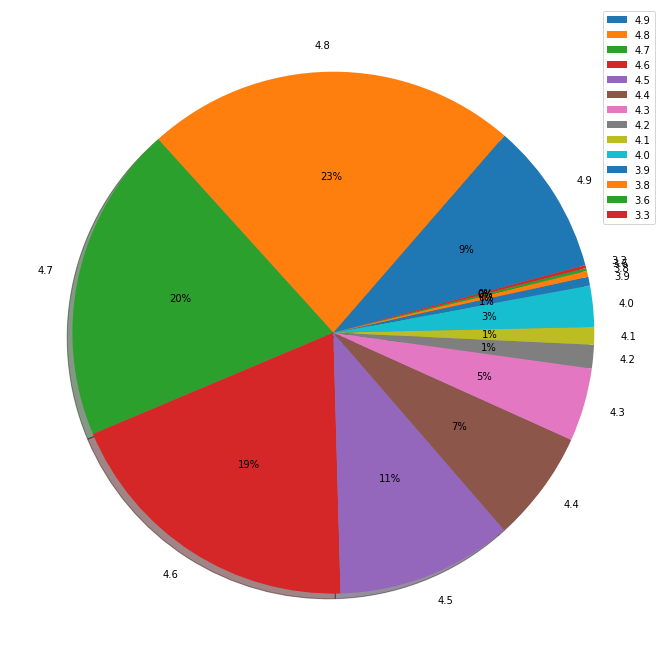

In [ ]:
# Se procede a graficar 
plt.figure(figsize=(20,12))
plt.pie(dupli, labels=rati['User Rating'],autopct='%1.0f%%', startangle=15, shadow = True) 
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



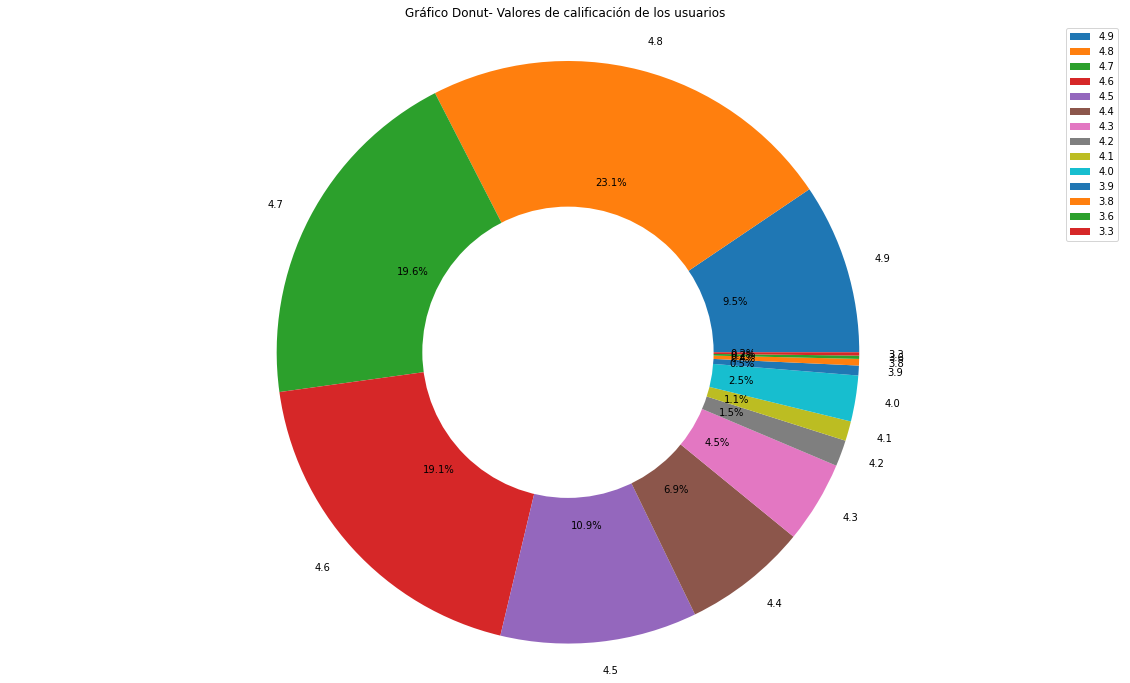

In [ ]:
# Se procede a graficar  en grafico de  rosca
plt.figure(figsize=(20,12))
plt.pie(dupli, labels=rati['User Rating'],autopct='%1.1f%%' ) 
plt.axis('equal')
circle = plt.Circle(xy=(0, 0), radius=0.5, facecolor='white')
plt.gca().add_artist(circle)
plt.title("Gráfico Donut- Valores de calificación de los usuarios")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 133 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 133 missing from current font.



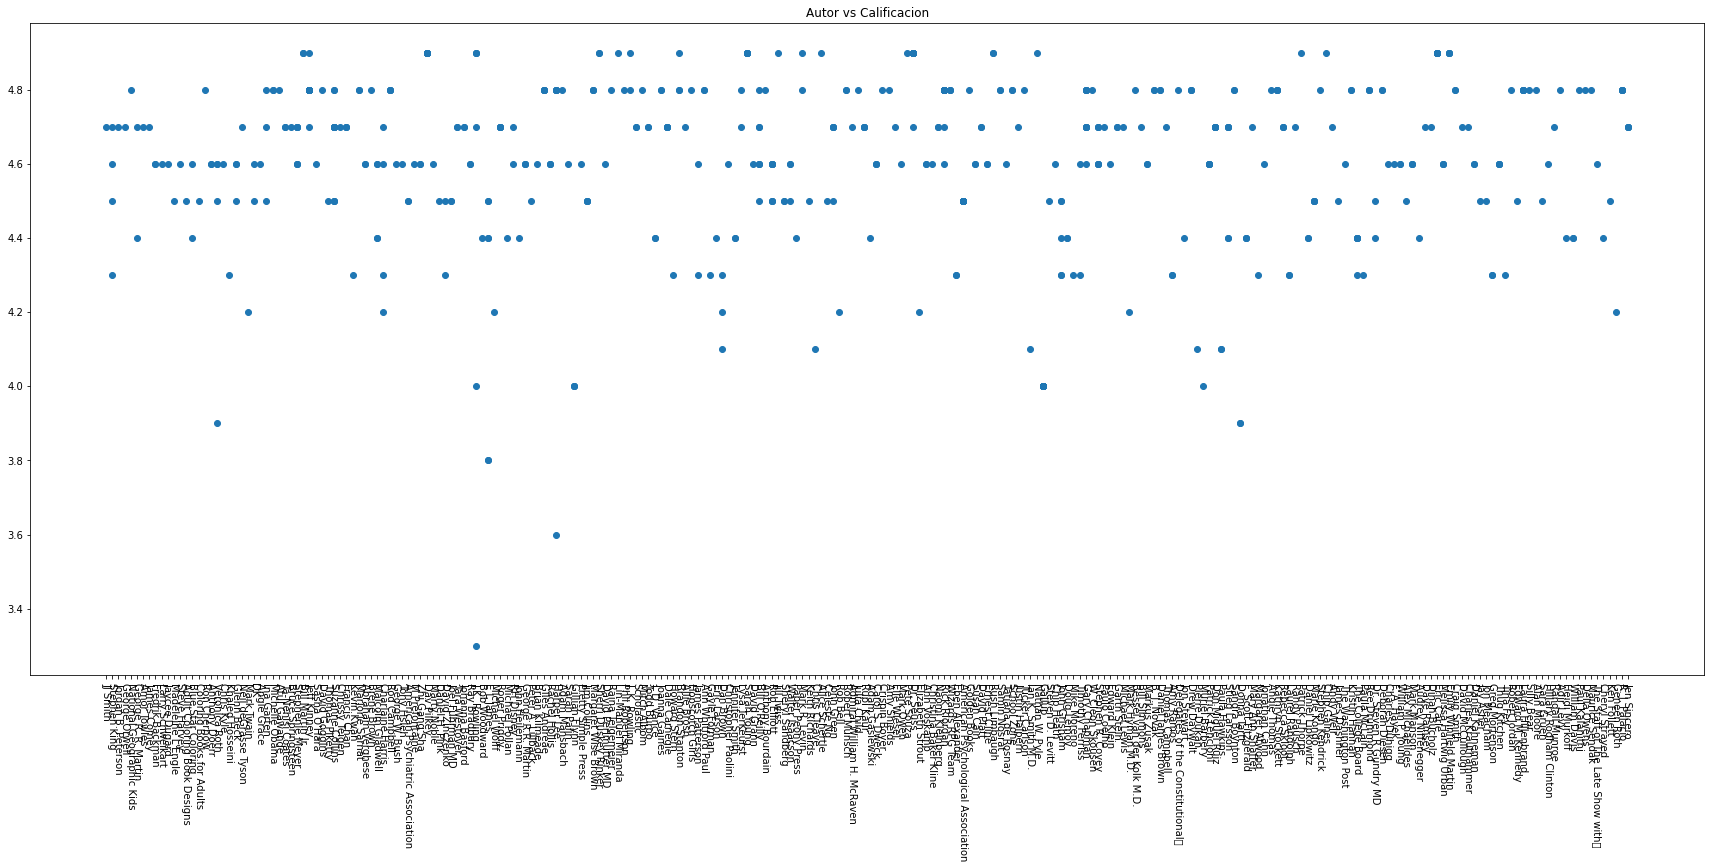

In [ ]:
#•	Visualizar diferentes autores y clasificaciones de usuarios para sus libros por la trama de dispersión 
AC=libros
plt.figure(figsize=(30,12))
x1=np.array(AC["Author"].values)
y1=np.array(AC["User Rating"].values)
plt.title("Autor vs Calificacion")
plt.scatter(x1, y1)
plt.xticks(rotation=270)
plt.show()

In [ ]:
#Cojimos 50 autores para mejor visualizacion
df=libros.head(50)
df = df.groupby('Author').mean('User Rating')
df = df.reset_index()
fig = px.scatter(data_frame = df,x='Author',y='User Rating',color = 'Author', title='Autor vs Clasificacion')
fig.show()

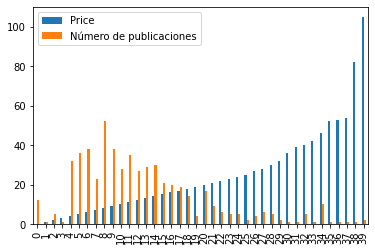

In [ ]:
#Visualizar varios precios de libros y su número de publicaciones usando un gráfico de barras
 
dupl_vu = libros.groupby(['Price']).size().reset_index(name='Número de publicaciones').plot(kind='bar')


In [ ]:
#Visualizar diferentes autores con las calificaciones de los usuarios y los valores de los precios de sus libros mediante el uso de la trama de dispersión en 3d
df = pd.DataFrame(libros)
fig = px.scatter_3d(data_frame=df, x='Author', y='Price', z='User Rating', color = 'Author', title='Gráfico 3D')
fig.show()


In [ ]:
#Contar los duplicados en la columna de género
cont_genr = libros.duplicated(subset='Genre', keep='first').sum()
print(cont_genr)

548


**2) Predecir – Modelo de Machine Learning**


In [ ]:
#Todos los datos deben ser numéricos para entrenar y probar la red
#Dividir las características de entrada y de destino

anio = pd.get_dummies(libros['Year'])
genero = pd.get_dummies(libros['Genre'])
conten = libros[['User Rating','Reviews','Price']]
x = pd.concat([conten,anio,genero], axis=1)

#Codificar de las etiquetas
etiqueta = preprocessing.LabelEncoder()
y = etiqueta.fit_transform(libros['Author'])

In [ ]:
# Reactualizar el dataset
nor_ds = preprocessing.MinMaxScaler()
x_ej = nor_ds.fit_transform(x)
x = pd.DataFrame(x_ej, columns=x.columns)

In [ ]:
#Dividir datos de entrenamiento y de pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0, train_size= 0.80)

In [ ]:
#Proceder el entrenamiento del modelo con el método Árbol de decisión
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [ ]:
#Calcular el score para el método Árbol de decisión
tree_one_accuracy = round(tree_one.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.4455


In [ ]:
#Predecir el método Árbol de decisión
predictions = tree_one.predict(x_test)
y_test, predictions

(array([ 58, 230, 221,  31, 210,  34, 208,  54, 104, 144, 199, 116, 202,
        128, 236, 220, 221, 205,  92,  28,  79, 235,  53, 224,  90, 242,
        104, 124, 172,  83, 112, 221,   9, 113, 203, 125, 192,  73,   5,
         69,  11, 197,  29, 150, 211, 113, 164, 234, 181, 238, 177, 147,
        160,  39,  71, 125, 230, 121, 142,  25, 103, 205,  76, 161,  82,
        226, 113,  87,  21,  76, 120,   8,  30, 120, 241, 129, 247,  50,
        199, 118,  27, 124,  90, 128, 216, 188, 121,  37,  11, 233, 213,
        137, 226, 209, 103,  64, 224, 230, 219,  73, 119, 104, 109,  83,
        230, 157, 122, 241, 197, 188]),
 array([120, 230, 221,  31,  29, 213, 208,  98, 104, 144, 199, 128, 202,
        128,  84, 220, 189, 205,  92, 146,  92, 235, 162,  93,  90, 218,
        104, 124, 172,  83, 123, 146,  33, 123, 203, 207, 195,  73, 199,
         14,  11, 117,   1, 213, 211, 211, 164,  92, 129, 238, 177, 190,
         70, 164, 241, 107, 230, 121, 142,  59, 105, 205,  96,  29,  82,
        226

In [ ]:
#Método Random Forest
randForest = RandomForestClassifier()
randForest.fit(x_train, y_train)
y_pred = randForest.predict(x_test)

In [ ]:
#Calcular el score para el método Random Forest
randForest_accuracy = round(randForest.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (randForest_accuracy))

Accuracy: 0.3000


In [ ]:
#Predecir por el método Random Forest
preer = randForest.predict(x_test)
y_test, preer

(array([ 58, 230, 221,  31, 210,  34, 208,  54, 104, 144, 199, 116, 202,
        128, 236, 220, 221, 205,  92,  28,  79, 235,  53, 224,  90, 242,
        104, 124, 172,  83, 112, 221,   9, 113, 203, 125, 192,  73,   5,
         69,  11, 197,  29, 150, 211, 113, 164, 234, 181, 238, 177, 147,
        160,  39,  71, 125, 230, 121, 142,  25, 103, 205,  76, 161,  82,
        226, 113,  87,  21,  76, 120,   8,  30, 120, 241, 129, 247,  50,
        199, 118,  27, 124,  90, 128, 216, 188, 121,  37,  11, 233, 213,
        137, 226, 209, 103,  64, 224, 230, 219,  73, 119, 104, 109,  83,
        230, 157, 122, 241, 197, 188]),
 array([120, 230, 221, 196, 177, 220, 102, 138, 104, 144, 199, 128,  66,
        128,  84, 220,  37, 121,  92,  11,  65, 235, 219,  91,  90, 218,
        104, 138, 148,  83,  58,   6,  33,  82, 203, 207,  31,  73, 199,
         59,  11,   0,  29, 124, 211,  73, 164,  92, 129,  27, 177, 174,
        160,  33,  53, 207, 230,  59, 188, 107,  94, 114, 129,  27,  58,
        226